## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Wine dataset

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df.shape)
df.info()

(178, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
print(f"Unique values in wine.target = {np.unique(wine.target,return_counts=True)}")

Unique values in wine.target = (array([0, 1, 2]), array([59, 71, 48], dtype=int64))


In [5]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, stratify=wine.target, test_size=0.2, random_state=0)

lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit (X_train, y_train)
y_pred = lr.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test, y_pred):.3f}")

Accuracy = 1.000


In [7]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization


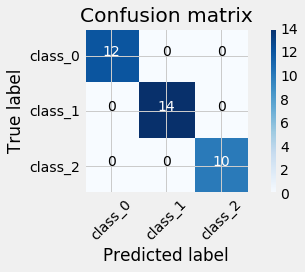

In [8]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat, classes=wine.target_names)

## Boston Dataset

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.shape)
df.info()

(506, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
from sklearn.metrics import r2_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=0)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# 可以看回歸模型的參數值
print('Coefficients: ', reg.coef_)

# 預測值與實際值的差距，使用 MSE
print(f"R^2 score = {r2_score(y_test, y_pred):.3f}")
print(f"Mean Square Error = {mean_squared_error(y_test, y_pred):.3f}")

Coefficients:  [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
R^2 score = 0.635
Mean Square Error = 29.782


(-2.500399106002555, 52.50838122605365, -2.5, 52.5)

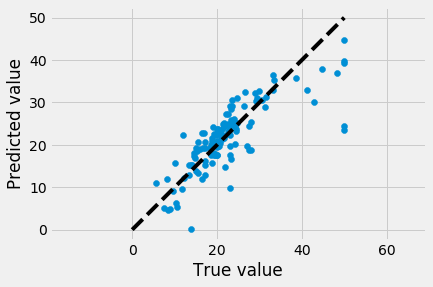

In [11]:
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], 'k--')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.axis('equal')